<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Census" data-toc-modified-id="Census-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Census</a></span></li><li><span><a href="#Sample" data-toc-modified-id="Sample-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Sample</a></span></li><li><span><a href="#Central-Limit-Theorem" data-toc-modified-id="Central-Limit-Theorem-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Central Limit Theorem</a></span></li></ul></div>

# Gremio Stadium
<BR CLEAR=”middle” />
<img src="https://besthqwallpapers.com/Uploads/30-12-2018/76317/arena-do-gremio-match-night-gremio-fc-hdr.jpg" width="1000" height="200" align="middle"/><BR CLEAR=”middle” />

Suppose I would like to know the average age of the supporters in the stadium. Considering a full house takes 60540 spectators, how would I go about it?

Essentially there are 3 strategies:
1. Census
2. Sample
3. Samples



## Census

Simply asking everyone in the stadium how old they are. There is one **big** advantage to this strategy:  
- Correct answer

Unfortunately there are also some downsides:
- Impractical 
- Expensive
- High, what inside a bank is known as, operational risk: Everything that can go wrong, will: Tally sheets getting lost or illegible, computers breaking down, interviewers needing a break etc. 

There is good reason why a census is not as popular a in 1 BC

However in this case it is good to set up a population for later use.

So lets assume for simplicity sake that the population will be between 20 and 80 years old and that each year is represented equally, i.e. is uniformly distributed. This way we know that the average age will be 50.


Number of spectators: 60540
Average age: 50.08457218368021 years


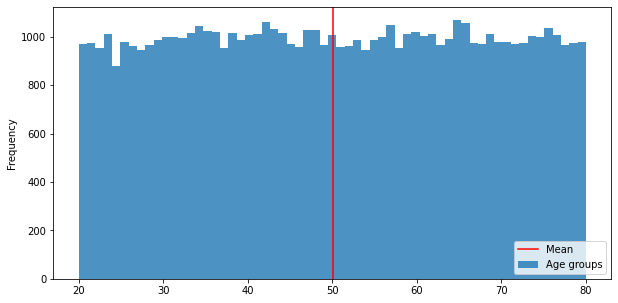

In [224]:
# generate random dice rolls
from numpy.random import seed
from numpy.random import randint
from numpy import mean, std
# seed the random number generator
seed(2019)
# generate a 'population' 
pop = pd.Series(randint(20, 81, 60540))

#Population mean:
print(f'Number of spectators: {len(pop)}')
print(f'Average age: {mean(pop)} years')
pop.plot.hist(bins=61, figsize=(10,5),alpha=0.8, label='Age groups')
# pop.plot(figsize=(10,5));
plt.axvline(mean(pop), c='r', label='Mean')
plt.legend(loc='lower right');


## Sample

My guess is that most probably the most common approach would be to draw a sample, implicitly meaning a *random* sample. I.e. randomly select a number of supporters, ask their age, calculate the average and take that number as the average for the stadium.

The 'Law of big numbers' states that as the size of a sample is increased, the more accurate of an estimate the sample mean will be of the population mean.

Now the question is: How big does this number need to be to be reliably close to the truth?

Luckily there are ways to calculate this and, more conveniently, websites like https://www.surveysystem.com/sscalc.htm . For the Gremio stadium it would be 8289 persons to produce an average plus or minus 1 year from the ground truth, 95 out of 100 samples.

Quite a number. 


In [47]:
# Draw single samples from the population at increasing sample sizes and calculate the means. 
# Take every 3rd for short list
x = range(1,5000)
y = [rolls.sample(_,random_state=2021).mean() for _ in range(1,20000)]
y_std = [rolls.sample(_, random_state=2021).std() for _ in range(1,20000)]
# for _ in range(1,5000,3):
#     print(f'mean for sample size {_}: {rolls.sample(_).mean()}, std : {y_std[_]}')
#     print(f'mean for sample size {_}: {y[_]}, std : {y_std[_]}')

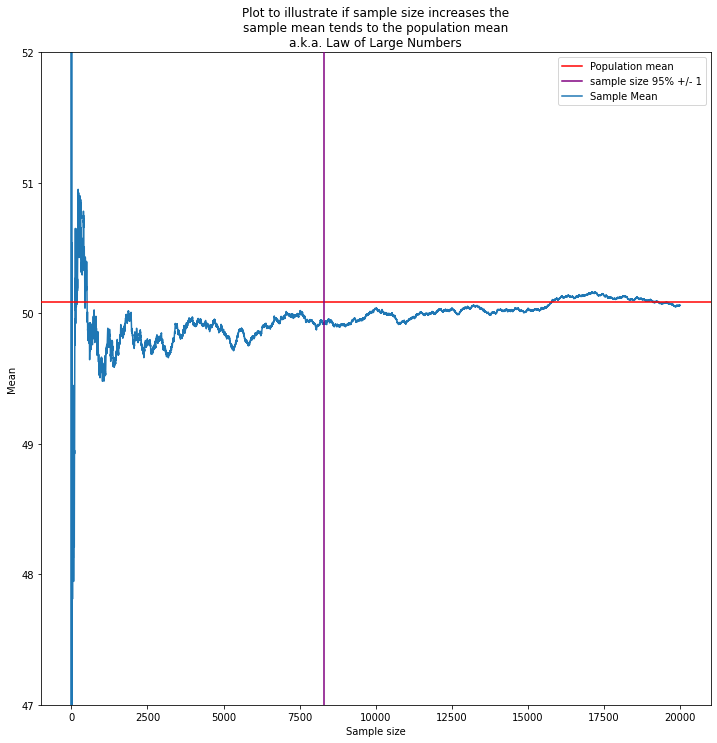

In [53]:
import matplotlib.pyplot as plt
# illustrate in a plot
plt.figure(figsize=(12,12))
plt.axhline(rolls.mean(), c='r', zorder=10, label = 'Population mean')
plt.axvline(8289, c='purple', zorder=10, label = 'sample size 95% +/- 1')
plt.plot(y, label='Sample Mean')
plt.title("Plot to illustrate if sample size increases the\nsample mean tends to the population mean\na.k.a. Law of Large Numbers")
plt.ylabel('Mean')
plt.xlabel('Sample size')
plt.ylim(47,52)
plt.legend(loc='best')
plt.show()

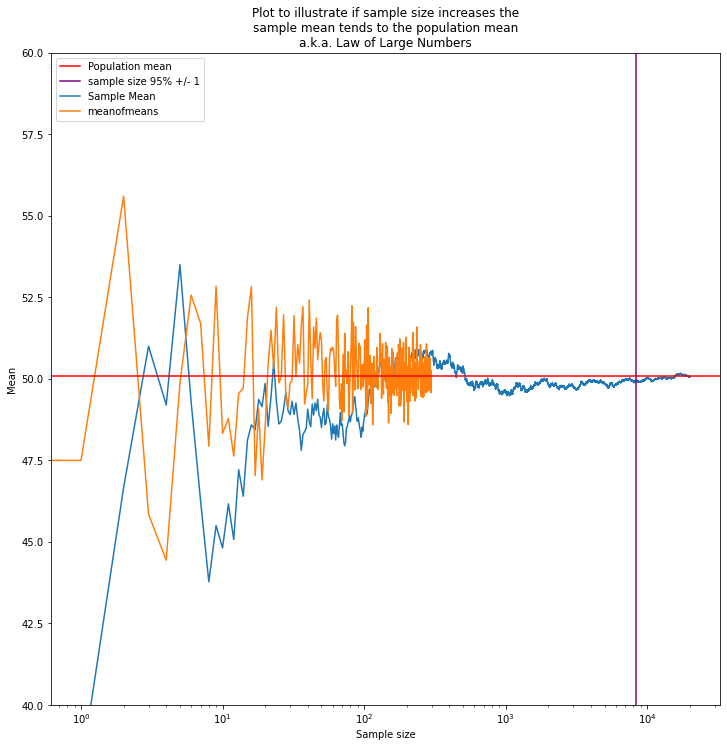

In [180]:
import matplotlib.pyplot as plt
# illustrate in a plot
plt.figure(figsize=(12,12))
plt.axhline(rolls.mean(), c='r', zorder=10, label = 'Population mean')
plt.axvline(8289, c='purple', zorder=10, label = 'sample size 95% +/- 1')
plt.plot(y, label='Sample Mean')
plt.plot(meanofmeans, label='meanofmeans')
plt.title("Plot to illustrate if sample size increases the\nsample mean tends to the population mean\na.k.a. Law of Large Numbers")
plt.ylabel('Mean')
plt.xlabel('Sample size')
plt.ylim(40,60)
plt.xscale('log')
plt.legend(loc='best')
plt.show()

https://www.surveysystem.com/sscalc.htm

In [42]:
y[4990:]

[50.67982368262873,
 50.678285256410255,
 50.67955137192069,
 50.6758109731678,
 50.67007007007007,
 50.66713370696557,
 50.66780068040824,
 50.67166866746699,
 50.667333466693336]

## Central Limit Theorem

Often confused with the Law of Large Numbers and closely related.

This theorem states that as the size of the sample increases, the distribution of the mean across multiple samples will approximate a Gaussian (a.k.a. Normal) distribution under the assumption of  independent and identically distributed samples, or iid.

In [8]:
# # generate random dice rolls
# from numpy.random import seed
# from numpy.random import randint
# from numpy import mean
# # seed the random number generator
# seed(1)
# # generate a sample of die rolls
# rolls = randint(1, 13, 50)
# print(rolls)
# print(mean(rolls))

5 Samples of 5 has a 53.120000000000005 mean of means
10 Samples of 5 has a 46.080000000000005 mean of means
20 Samples of 5 has a 49.61 mean of means
30 Samples of 5 has a 50.42666666666667 mean of means
50 Samples of 5 has a 51.244000000000014 mean of means
100 Samples of 5 has a 51.174 mean of means
1000 Samples of 5 has a 50.3198 mean of means
10000 Samples of 5 has a 49.8998 mean of means
5 Samples of 10 has a 48.900000000000006 mean of means
10 Samples of 10 has a 51.61999999999999 mean of means
20 Samples of 10 has a 46.660000000000004 mean of means
30 Samples of 10 has a 50.56666666666667 mean of means
50 Samples of 10 has a 49.181999999999995 mean of means
100 Samples of 10 has a 50.378 mean of means
1000 Samples of 10 has a 50.2233 mean of means
10000 Samples of 10 has a 49.98037 mean of means
5 Samples of 100 has a 51.12599999999999 mean of means
10 Samples of 100 has a 50.935 mean of means
20 Samples of 100 has a 49.99050000000001 mean of means
30 Samples of 100 has a 50.16

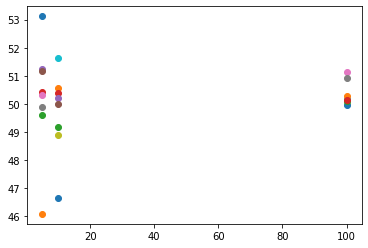

In [104]:
# demonstration of the central limit theorem
import numpy as np
from numpy.random import seed
from numpy.random import randint
from numpy import mean
from matplotlib import pyplot
import seaborn as sns
from scipy import stats
# seed the random number generator
seed(2019)

n_samples = [5,10,20,30, 50,100,1000, 10000]
n_observations = [5,10,100]

# for _ in n_observations:
#     for __ in n_samples:
#         print(rolls.sample(_).mean())
# calculate the mean of 50 dice rolls 1000 times
# for n in n_samples:
# for n in n_samples:
#     for i in n_observations:
#         means = mean([rolls.sample(i).mean() for _ in range(n)])
#         print(f'{n} Samples of {i} has a {means} mean of means')
        
for i in n_observations:
    for n in n_samples:
        means = mean([rolls.sample(i).mean() for _ in range(n)])
        print(f'{n} Samples of {i} has a {means} mean of means')
        
        plt.scatter(i,means)
   
# #     means = [mean(randint(1, 7, 100)) for _ in range(n)]
# # plot the distribution of sample means
    
#         fig, (ax1, ax2) = plt.subplots(1,2 , figsize = (8,4))
#         sns.distplot(means, label = 'mean age', ax=ax1)
#         ax1.axvline(mean(means), label ='mean', color = 'b', lw= 2)
#         ax1.axvline(np.median(means), label ='median', color = 'g', lw= 2)       # Plot histogram
#         ax1.set_title("Distribution plot")

#         stats.probplot(means, plot = ax2)
#         fig.suptitle(f'{n} samples of', fontsize=20)
#         pyplot.show()

In [147]:
n_samples = [5,10,20,30, 50,100,1000]
n_observations = [5,10,100]

# mean([rolls.sample(5).mean() for _ in n_samples])

[rolls.sample(5).mean() for _ in n_samples]


# means=[]
# for n in n_samples:
#     means.append([rolls.sample(5).mean() for _ in range(n)])
      
# for i,m in enumerate(means):
#     print(n_samples[i],mean(m), std(means))
# for n in n_samples:
#     means = mean([rolls.sample(5).mean() for _ in range(n)])
#     print(f'{n} Samples of {i} has a {means} mean of means')

#     plt.plot(means)

[63.4, 63.2, 52.4, 37.6, 50.0, 46.4, 49.0]

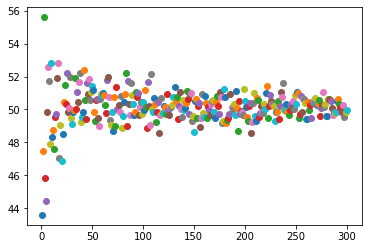

In [176]:
n_samples = list(range(1,301))#[5,10,20,30, 50,100,1000]
n_observations = [5,10,100]

# mean([rolls.sample(5).mean() for _ in n_samples])

means=[]
for n in n_samples:
    means.append([rolls.sample(5).mean() for _ in range(n)])
      
for i,m in enumerate(means):
    plt.scatter(n_samples[i],mean(m))
# for n in n_samples:
#     means = mean([rolls.sample(5).mean() for _ in range(n)])
#     print(f'{n} Samples of {i} has a {means} mean of means')

# plt.plot(means)

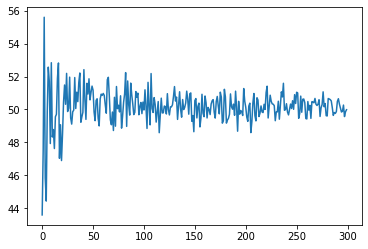

In [177]:
# plt.plot(means, label='mom')
meanofmeans=[]
for m in means:
    meanofmeans.append(mean(m))
plt.plot(meanofmeans)


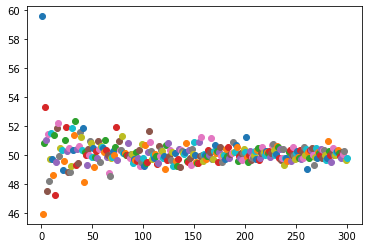

In [181]:
n_samples = list(range(1,301))#[5,10,20,30, 50,100,1000]
n_observations = [5,10,100]

# mean([rolls.sample(5).mean() for _ in n_samples])

means=[]
for n in n_samples:
    means.append([rolls.sample(10).mean() for _ in range(n)])
      
for i,m in enumerate(means):
    plt.scatter(n_samples[i],mean(m))
# for n in n_samples:
#     means = mean([rolls.sample(5).mean() for _ in range(n)])
#     print(f'{n} Samples of {i} has a {means} mean of means')

# plt.plot(means)

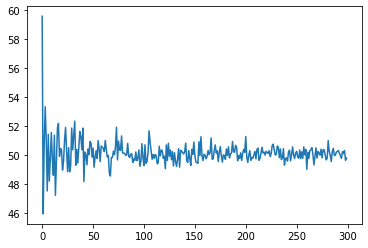

In [182]:
# plt.plot(means, label='mom')
meanofmeans=[]
for m in means:
    meanofmeans.append(mean(m))
plt.plot(meanofmeans)


In [171]:
list(range(1,101))

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100]

/Users/maartenk/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2163: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


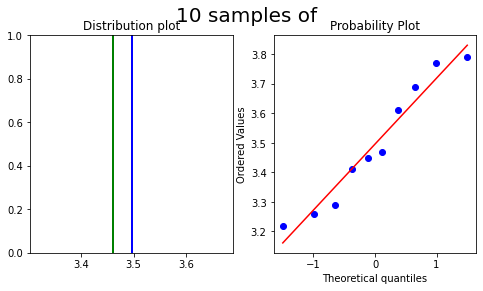

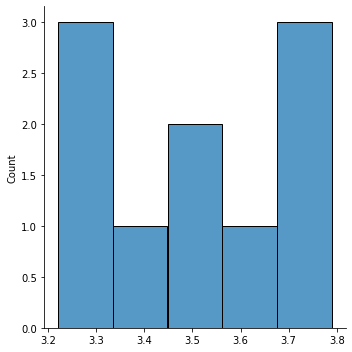

/Users/maartenk/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2163: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


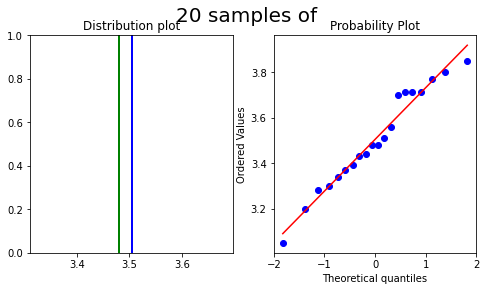

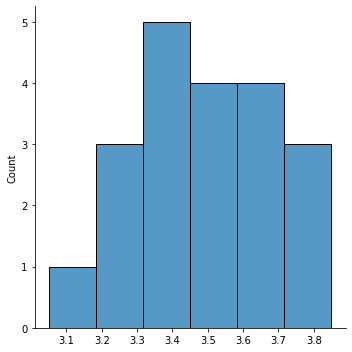

/Users/maartenk/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2163: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


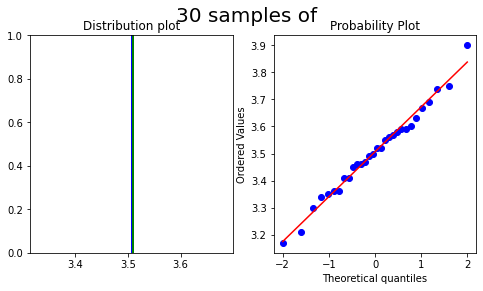

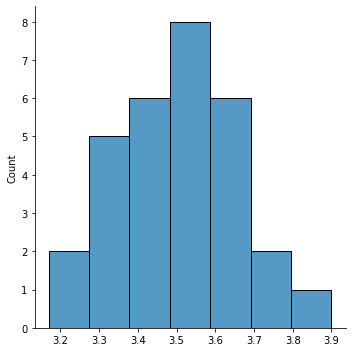

/Users/maartenk/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2163: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


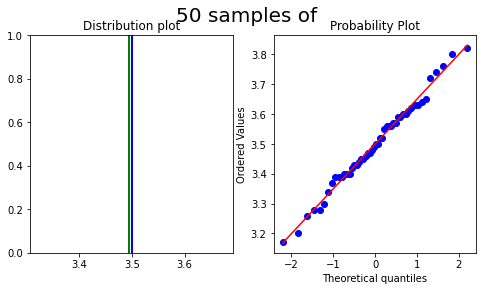

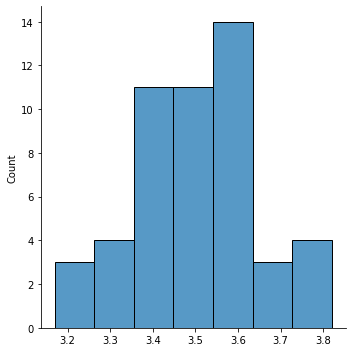

/Users/maartenk/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2163: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


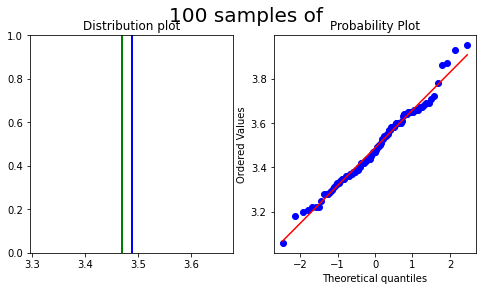

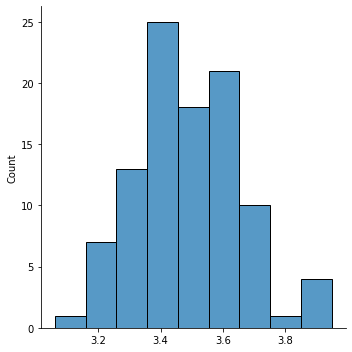

/Users/maartenk/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2163: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


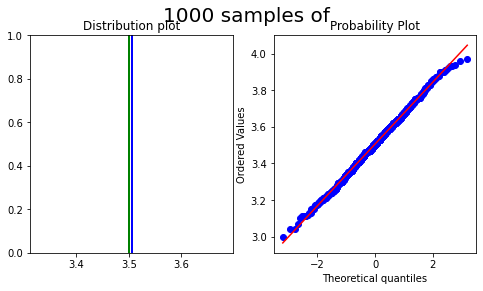

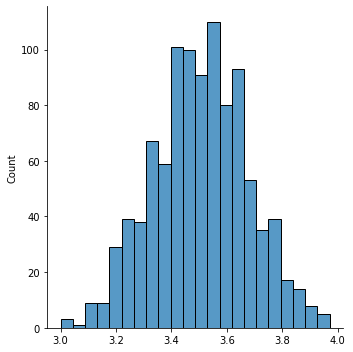

/Users/maartenk/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2163: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


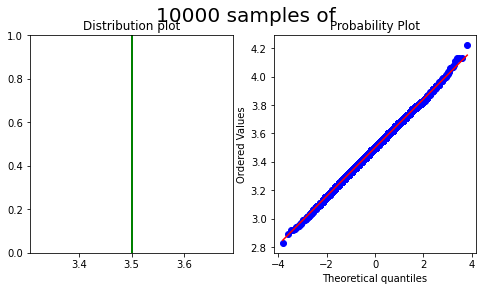

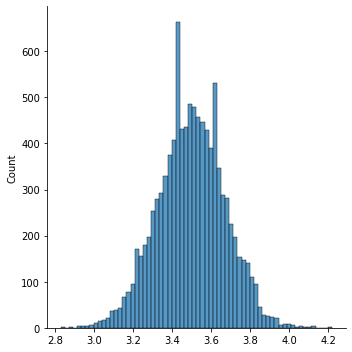

In [58]:
# demonstration of the central limit theorem
import numpy as np
from numpy.random import seed
from numpy.random import randint
from numpy import mean
from matplotlib import pyplot
import seaborn as sns
from scipy import stats
# seed the random number generator
seed(2019)

n_samples = [10,20,30,50,100,1000, 10000]
n_observations = [10,100]
# calculate the mean of 50 dice rolls 1000 times
for n in n_samples:
    
   
    means = [mean(randint(1, 7, 100)) for _ in range(n)]
# plot the distribution of sample means
    
    fig, (ax1, ax2) = plt.subplots(1,2 , figsize = (8,4))
    sns.displot(means, label = 'Attack Freq', ax=ax1)
    ax1.axvline(mean(means), label ='mean', color = 'b', lw= 2)
    ax1.axvline(np.median(means), label ='median', color = 'g', lw= 2)       # Plot histogram
    ax1.set_title("Distribution plot")

    stats.probplot(means, plot = ax2)
    fig.suptitle(f'{n} samples of', fontsize=20)
    pyplot.show()

/Users/maartenk/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


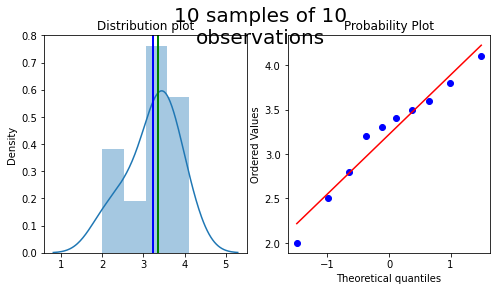

/Users/maartenk/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


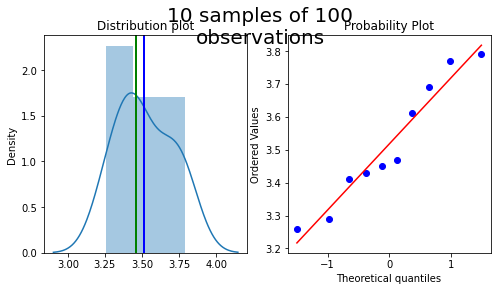

/Users/maartenk/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


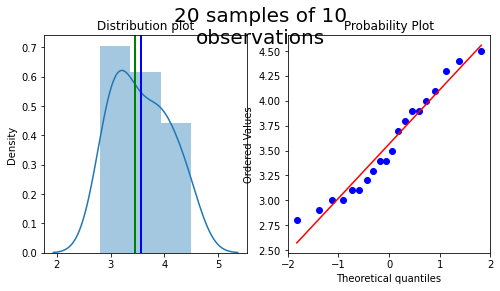

/Users/maartenk/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


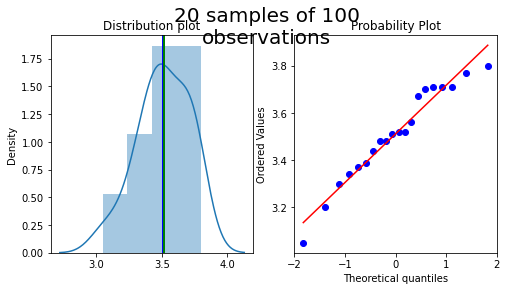

/Users/maartenk/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


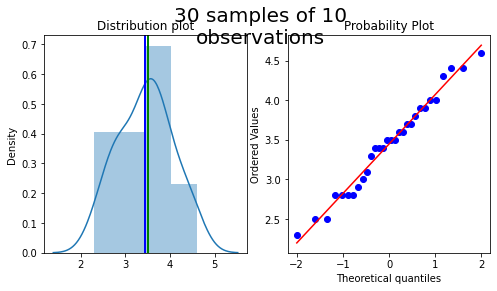

/Users/maartenk/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


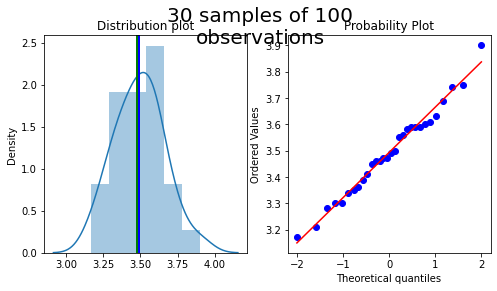

/Users/maartenk/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


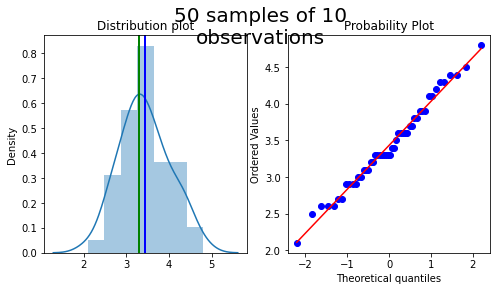

/Users/maartenk/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


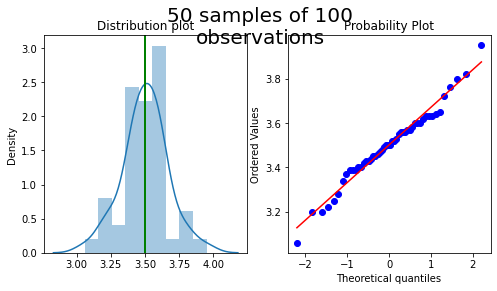

/Users/maartenk/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


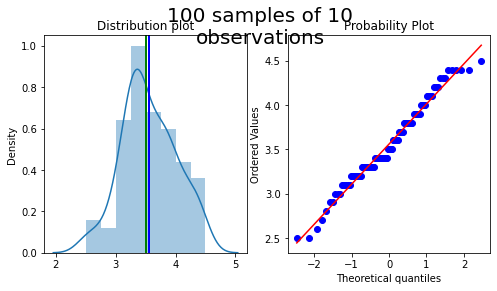

/Users/maartenk/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


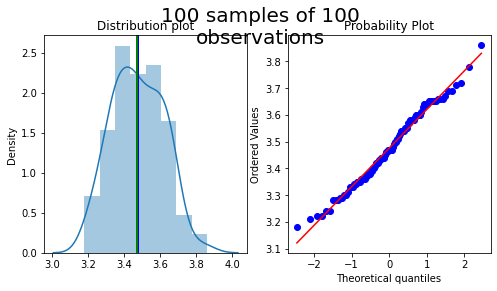

/Users/maartenk/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


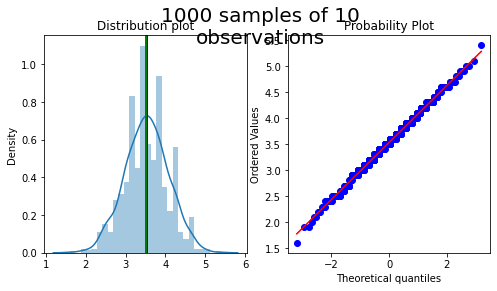

/Users/maartenk/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


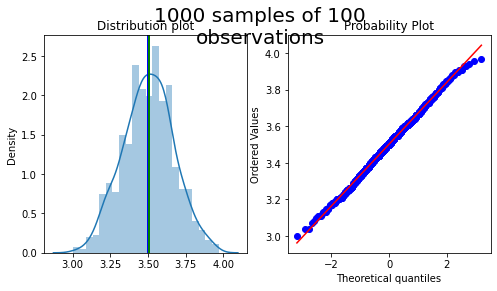

/Users/maartenk/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


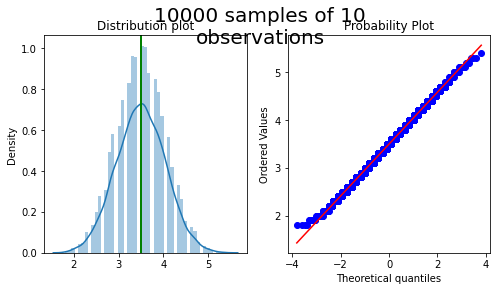

/Users/maartenk/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


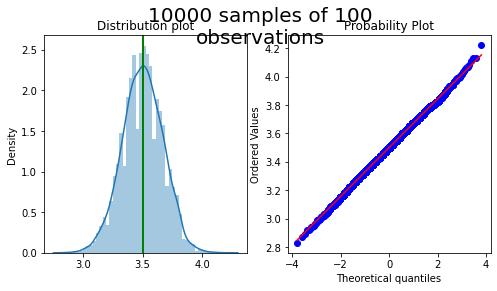

In [13]:
# demonstration of the central limit theorem
import numpy as np
from numpy.random import seed
from numpy.random import randint
from numpy import mean
from matplotlib import pyplot
# seed the random number generator
seed(2019)

n_samples = [10,20,30,50,100,1000, 10000]
n_observations = [10,100]
# calculate the mean of n_observation  dice rolls n_samples times
for n in n_samples:
    for i in n_observations:
        means = [mean(randint(1, 7, i)) for _ in range(n)]
# plot the distribution of sample means
    
        fig, (ax1, ax2) = plt.subplots(1,2 , figsize = (8,4))
        sns.distplot(means, label = 'Attack Freq', ax=ax1)
        ax1.axvline(mean(means), label ='mean', color = 'b', lw= 2)
        ax1.axvline(np.median(means), label ='median', color = 'g', lw= 2)       # Plot histogram
        ax1.set_title("Distribution plot")

        stats.probplot(means, plot = ax2)
        fig.suptitle(f'{n} samples of {i}\nobservations', fontsize=20)
        pyplot.show()

In [29]:
import pandas as pd
df = pd.Series(range(1,100,1))

In [31]:
means = []
for i in range(100):
    means.append(df.sample(5).mean())
mean(means)
    

50.16999999999999

In [140]:
meansample = []
for i in range(1,100):
    meansample.append(df.sample(i).mean())
meansample
    

[70.0,
 54.0,
 52.333333333333336,
 72.25,
 40.0,
 31.666666666666668,
 49.42857142857143,
 51.5,
 51.0,
 49.9,
 48.72727272727273,
 39.416666666666664,
 49.23076923076923,
 52.642857142857146,
 45.6,
 44.75,
 43.8235294117647,
 62.611111111111114,
 62.526315789473685,
 45.7,
 56.76190476190476,
 45.77272727272727,
 50.0,
 59.333333333333336,
 50.32,
 54.42307692307692,
 56.03703703703704,
 59.607142857142854,
 48.55172413793103,
 51.733333333333334,
 49.193548387096776,
 43.90625,
 50.60606060606061,
 55.35294117647059,
 48.02857142857143,
 52.97222222222222,
 43.972972972972975,
 54.3421052631579,
 48.41025641025641,
 47.0,
 47.829268292682926,
 51.38095238095238,
 51.95348837209303,
 48.38636363636363,
 47.48888888888889,
 52.19565217391305,
 46.38297872340426,
 48.0,
 46.55102040816327,
 47.44,
 51.68627450980392,
 52.13461538461539,
 54.37735849056604,
 50.7037037037037,
 45.38181818181818,
 51.625,
 44.578947368421055,
 51.63793103448276,
 44.6271186440678,
 50.78333333333333,
 4

In [133]:
num_samples = 2
means = []
for r in range(num_samples):
    means.append(df.sample(5, random_state=r).mean())
    print(df.sample(5, random_state=r).values.tolist(), df.sample(5, random_state=r).mean() )
print(mean(means))

[27, 87, 3, 56, 76] 49.8
[93, 84, 33, 81, 79] 74.0
61.9


58.3
63.5
53.06666666666666
53.65
53.52
50.616666666666674
50.07142857142858
50.45
50.1
49.84
49.118181818181824
49.150000000000006
47.415384615384625
47.40714285714286
47.93333333333333
48.2875
47.970588235294116
47.84444444444445
47.363157894736844
47.52
47.16666666666667
47.38636363636363
47.68695652173913
47.74166666666665
47.963999999999984
48.29999999999999
48.466666666666654
48.77142857142856
48.81724137931033
48.40666666666665
48.654838709677406
48.28125
48.49090909090909
48.80294117647059
48.58285714285714
48.86388888888889
48.88108108108108
48.955263157894734
49.04358974358974
49.0125
48.99024390243902
48.97380952380953
49.04883720930232
48.90909090909091
48.81333333333333
48.80869565217391
48.7531914893617
49.0625
49.03265306122449
48.922
49.0
49.103846153846156
48.900000000000006
48.99074074074075
49.02
49.300000000000004
49.26491228070176
49.07241379310345
49.05762711864407
49.07666666666667
49.18852459016394
49.18709677419355
49.46031746031746
49.4484375
49.44923076923076

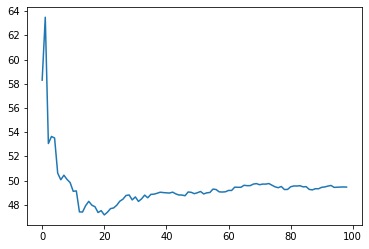

In [146]:
meanofmeans = []
for i in range(1,100):
    num_samples = i
    means = []
    for r in range(num_samples):
        means.append(df.sample(10, random_state=r).mean())
#         print(df.sample(5, random_state=r).values.tolist(), df.sample(5, random_state=r).mean() )
    print(mean(means))
    meanofmeans.append(mean(means))
plt.plot(meanofmeans)

In [64]:
import matplotlib.pyplot as plt

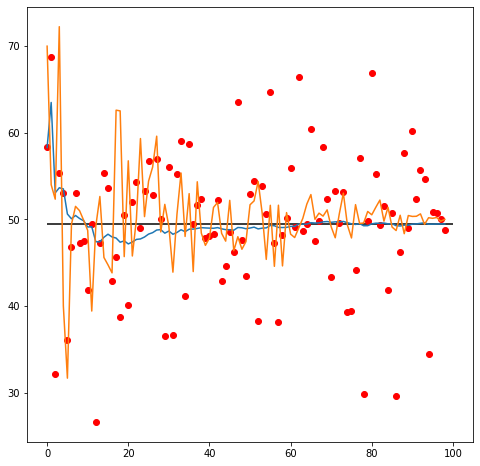

In [147]:
plt.figure(figsize=(8,8))
plt.plot(means, 'ro')
plt.hlines(mean(means),0,100)
plt.plot(meanofmeans)
plt.plot(meansample)

In [80]:
plt.hlines(mean(means))

TypeError: hlines() missing 2 required positional arguments: 'xmin' and 'xmax'

In [117]:
meansmean = []
for i in range(1,2):
    means = []
    means.append(df.sample(5, random_state=i).mean())
    print(means)
#     print(df.sample(5, random_state=i).values.tolist(), df.sample(5, random_state=i).mean() )
#     meansmean.append(mean(means))
# # plt.plot(meansmean)

[74.0]


In [131]:
for i in range(1,4):
    print(df.sample(5, random_state=i).mean())
print(mean([df.sample(5, random_state=i).mean()]))

74.0
44.8
59.2
59.2


means